In [1]:
import sys,os
import tempfile
import shutil
sys.path.append("..")
%matplotlib inline
import trappy
trace_thermal = "./plotter_trace.txt"
trace_sched = "../tests/trace_sched.txt"
TEMP_BASE = "/tmp"

In [2]:
def setup_thermal():
    tDir = tempfile.mkdtemp(dir="/tmp", prefix="trappy_doc", suffix = ".tempDir")
    shutil.copyfile(trace_thermal, os.path.join(tDir, "trace.txt"))
    return tDir

def setup_sched():
    tDir = tempfile.mkdtemp(dir="/tmp", prefix="trappy_doc", suffix = ".tempDir")
    shutil.copyfile(trace_sched, os.path.join(tDir, "trace.txt"))
    return tDir

In [3]:
temp_thermal_location = setup_thermal()
trace1 = trappy.FTrace(temp_thermal_location, scope="thermal")
trace2 = trappy.FTrace(temp_thermal_location, scope="thermal")
trace2.thermal.data_frame["temp"] = trace1.thermal.data_frame["temp"] * 2
trace2.cpu_out_power.data_frame["power"] = trace1.cpu_out_power.data_frame["power"] * 2

/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:788: UserWarning: Reading from .txt file, .dat is preferred. Not only do .txt files occupy more disk space, it is also not possible to determine the format of the traces contained within them.
  warnings.warn(warnstr)


# Usage of Signals

A signal is  a string which represents a combination of a TRAPpy event and a column. The format of the signal is, "event_name:column". e.g, thermal:temp. 

The Plotter API can accept either a list of signals as an input or a combination of templates and columns. Here is an example on how to use signals:



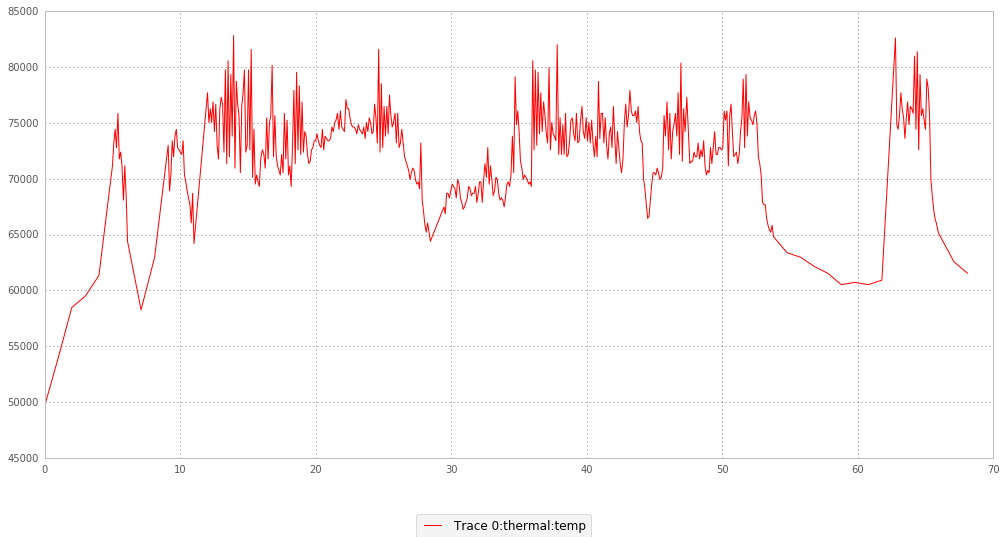

In [4]:
l = trappy.LinePlot(trace1, signals=["thermal:temp"])
l.view()

Use an additional parameter to specify the color of the line in rgb: "event_name:column:color".  The color is specified as a comma separated of rgb values, from 0 to 255 or from 0x0 to 0xff.  E.g. 0xff,0x0,0x0 is red and 100,40,32 is brown.  Similar to the example above, to plot the temperature in purple and the previous temperature in green you can do:

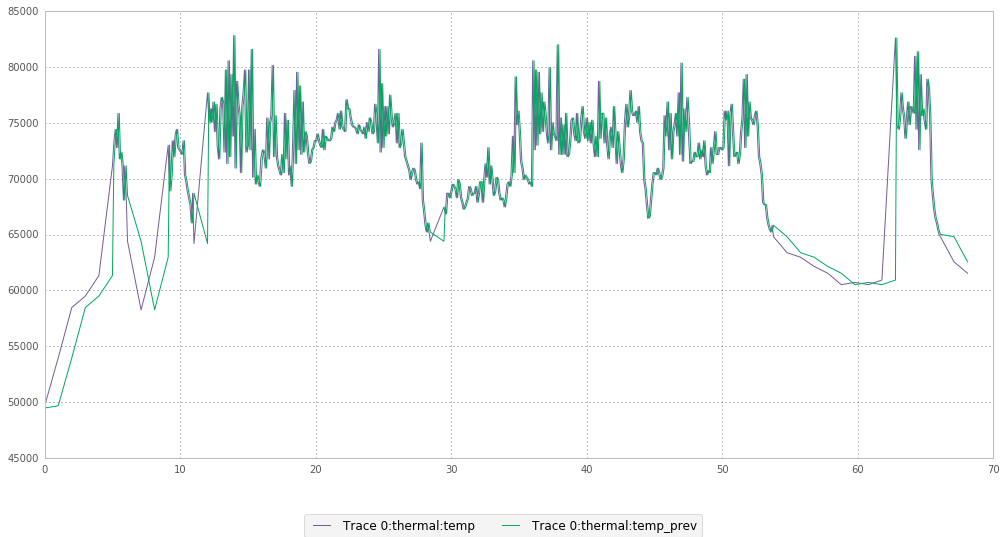

In [5]:
trappy.LinePlot(trace1, signals=["thermal:temp:118,95,151", "thermal:temp_prev:0,0xa9,0x60"]).view()

# Limiting axes to focus on a given region

It is possible to set the limits of the X and Y axes by means of the `xlim` and `ylim` parameters:

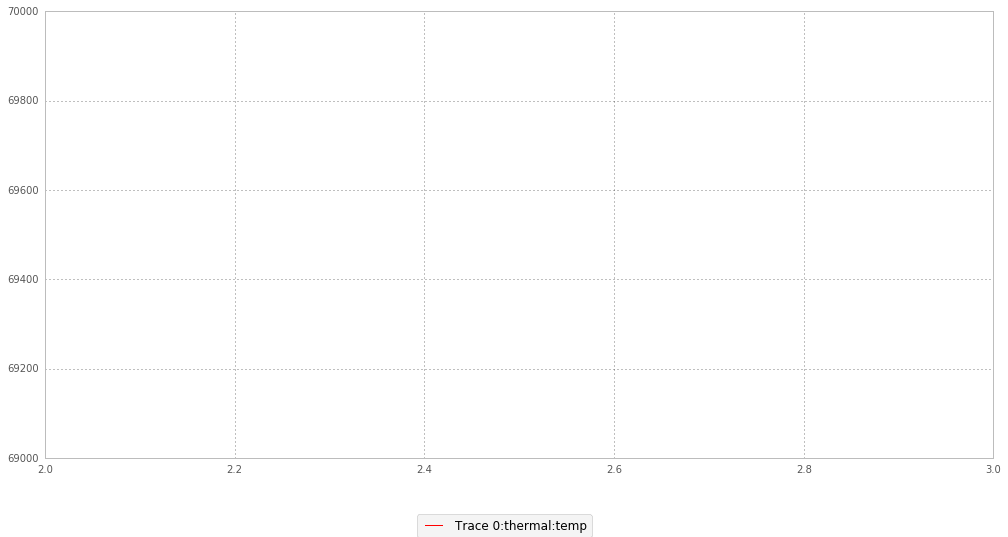

In [26]:
l = trappy.LinePlot(trace1, signals=["thermal:temp"], xlim=(2, 3), ylim=(69000, 70000))
l.view()

# No Pivot Simple

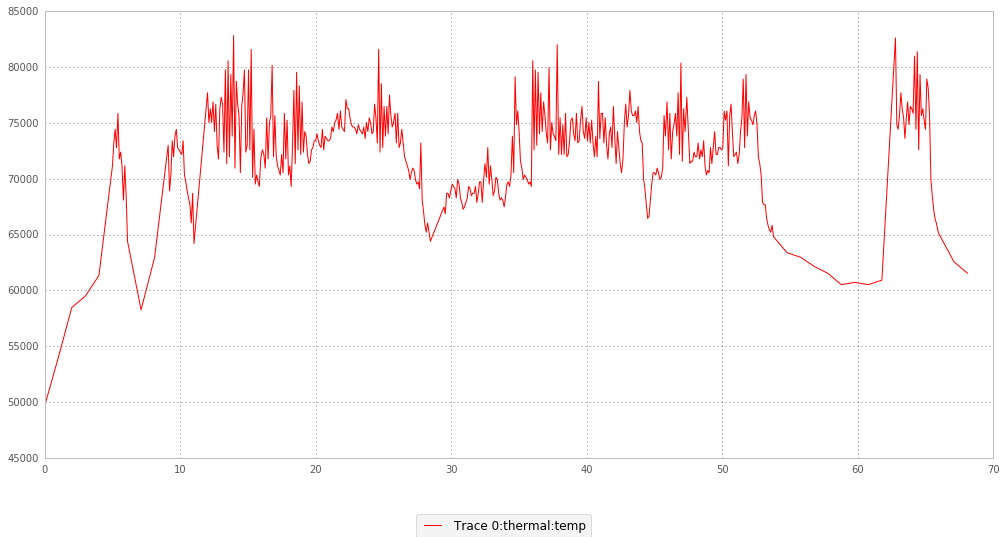

In [27]:
l = trappy.LinePlot(trace1, trappy.thermal.Thermal, column="temp")
l.view()

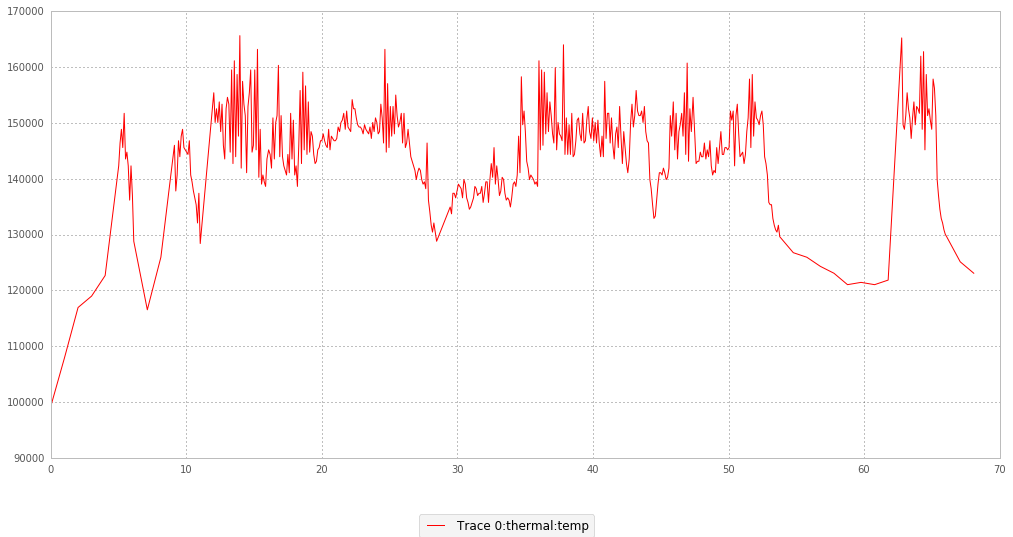

In [28]:
l = trappy.LinePlot(trace2, trappy.thermal.Thermal, column="temp")
l.view()

# No Pivot Multi Trace

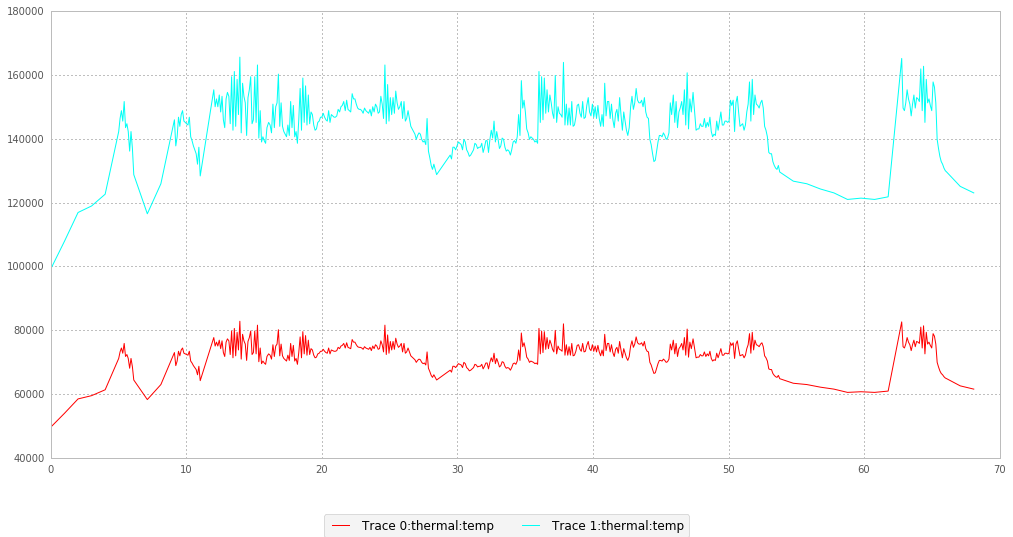

In [29]:
l = trappy.LinePlot([trace1, trace2], trappy.thermal.Thermal, column="temp")
l.view()

# No Pivot Mutiple Columns and Traces

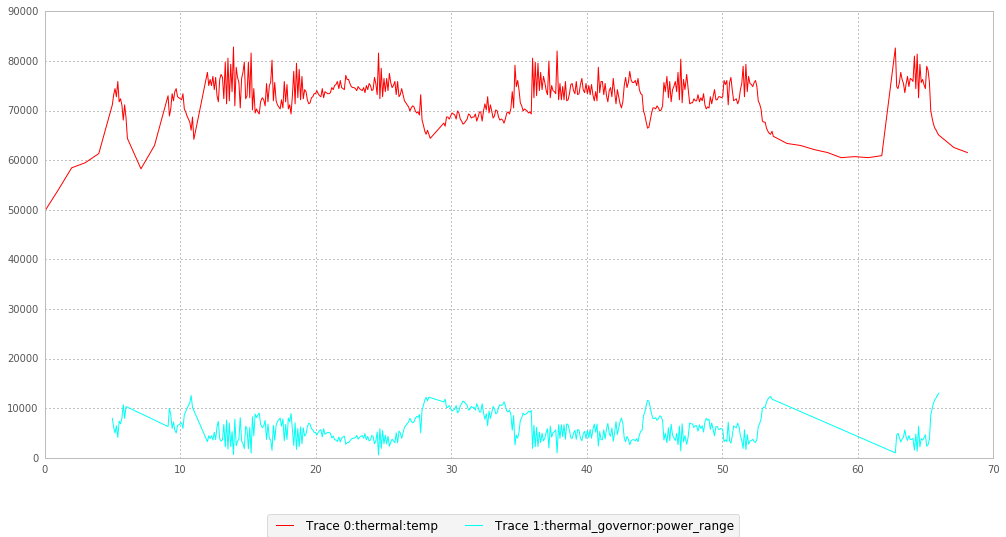

In [30]:
l = trappy.LinePlot([trace1, trace2], [trappy.thermal.Thermal,trappy.thermal.ThermalGovernor], column=["temp", "power_range"])
l.view()

# No Pivot With Filters

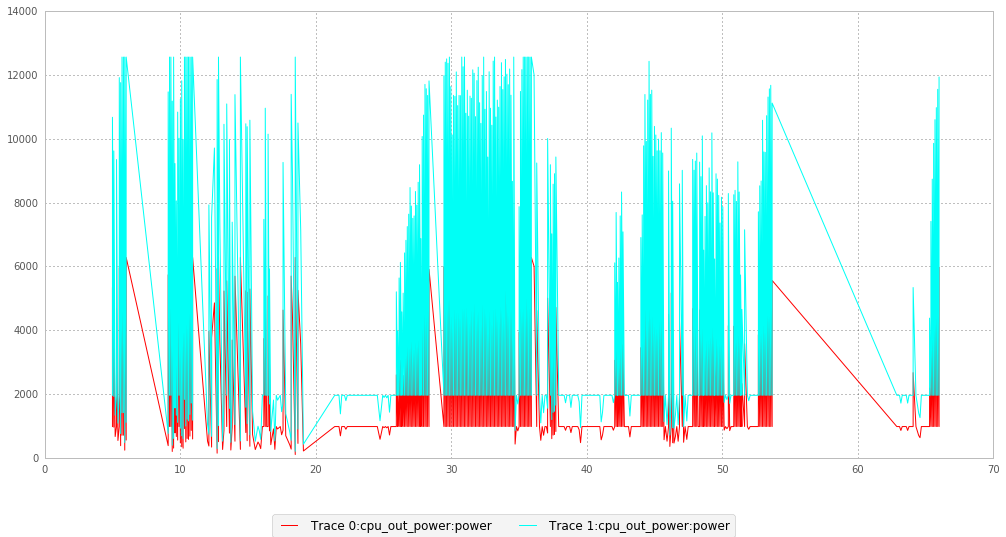

In [31]:
l = trappy.LinePlot([trace1, trace2], [trappy.cpu_power.CpuOutPower], column="power", filters={"cdev_state": [0]})
l.view()

# Pivoted Data

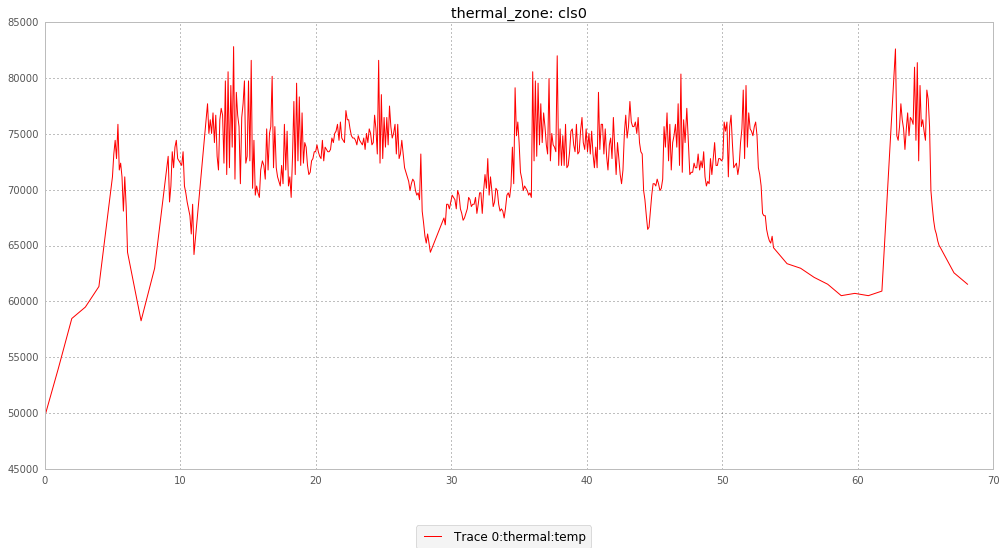

In [32]:
l = trappy.LinePlot(trace1, trappy.thermal.Thermal, column="temp", pivot="thermal_zone")
l.view()

# Pivoted Multi Trace Data

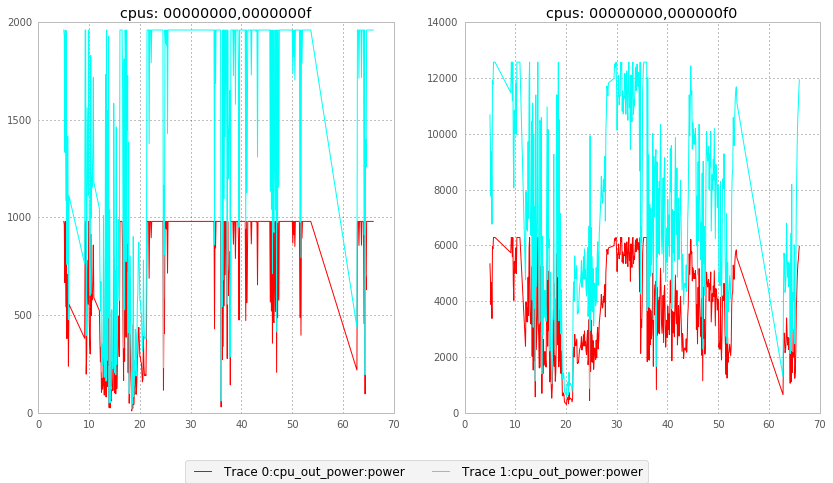

In [33]:
l = trappy.LinePlot([trace1, trace2], trappy.cpu_power.CpuOutPower, column="power", pivot="cpus")
l.view()

# Labelling Pivots

A dictionary at that maps pivot values into possibly useful labels can be provided

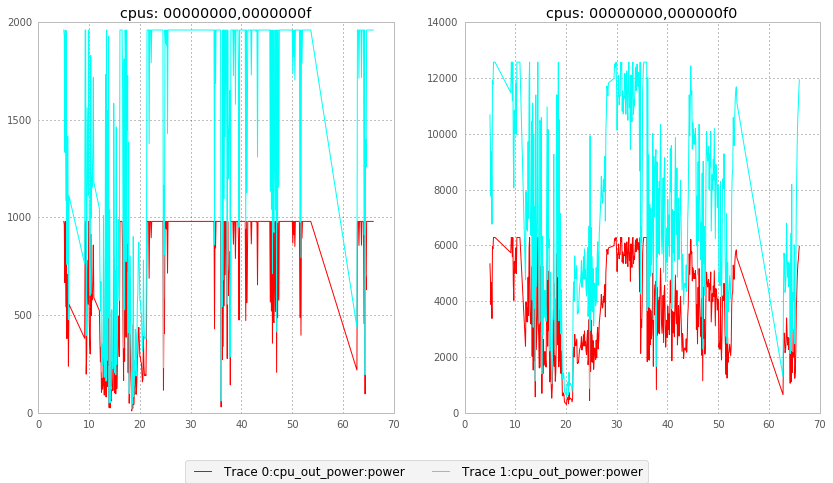

In [34]:
map_label = {
            "00000000,00000006" : "A57",
            "00000000,00000039" : "A53",
}
    
l = trappy.LinePlot([trace1, trace2],
                    trappy.cpu_power.CpuOutPower,
                    column="power",
                    pivot="cpus",
                    map_label=map_label)
l.view()

`xlim` can be used to limit the X axes to focus on a given range for both plots:

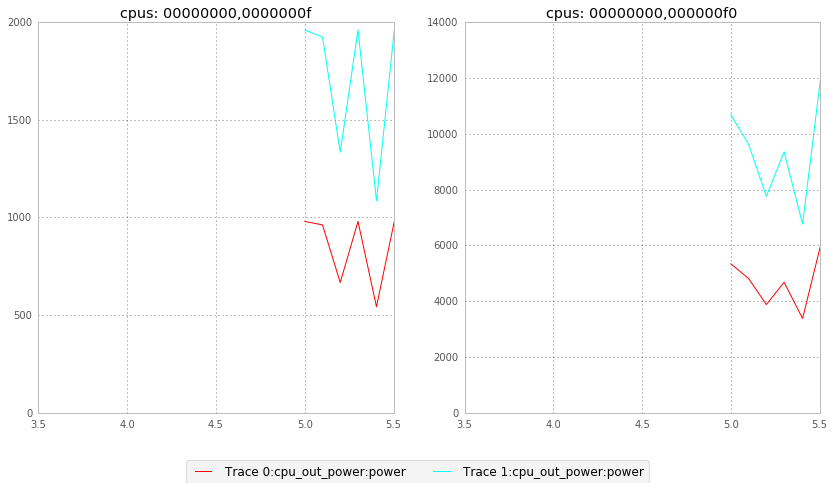

In [35]:
l = trappy.LinePlot([trace1, trace2],
                    trappy.cpu_power.CpuOutPower,
                    column="power",
                    pivot="cpus",
                    map_label=map_label,
                    xlim=(3.5,5.5))
l.view()

`color` can be used to specify different colors for the lines.  For instance, to make the lines dark grey and dark blue you can do:

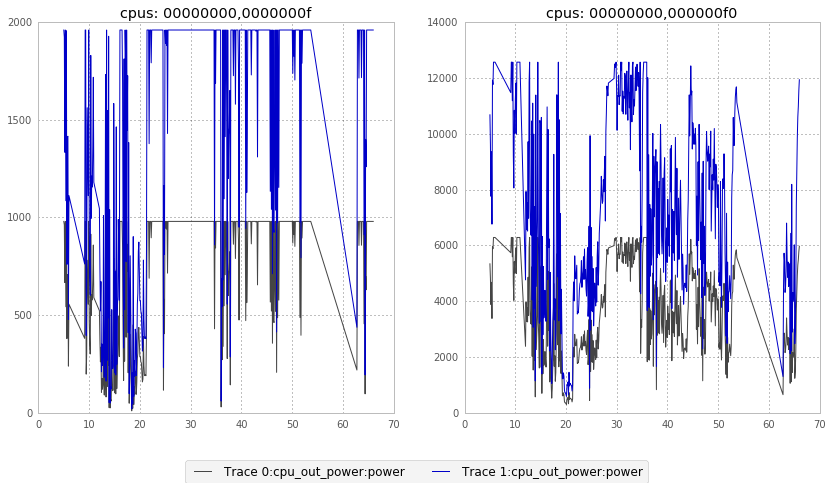

In [36]:
trappy.LinePlot([trace1, trace2],
                trappy.cpu_power.CpuOutPower,
                column="power",
                pivot="cpus",
                map_label=map_label,
                colors=[[69, 69, 69], [0, 0, 0xc8]],
                ).view()

# Pivoted Data Multiple Traces and Columns

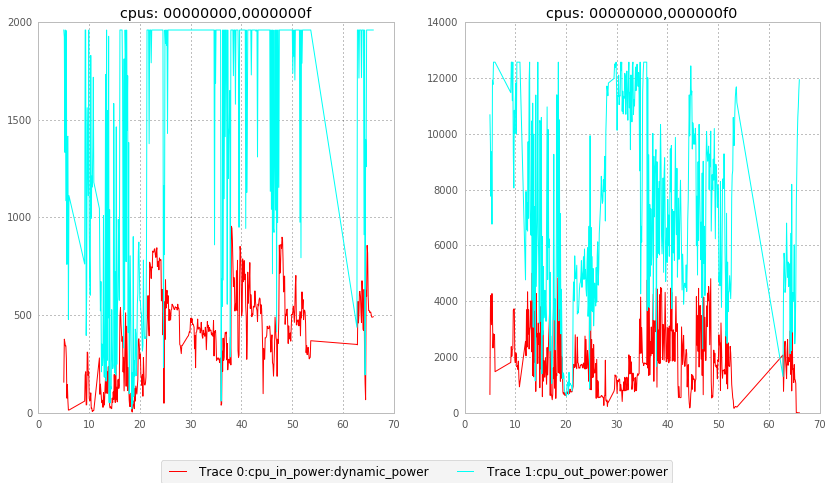

In [37]:
l = trappy.LinePlot([trace1, trace2],
                    [trappy.cpu_power.CpuInPower, trappy.cpu_power.CpuOutPower],
                    column=["dynamic_power", "power"],
                    pivot="cpus")
l.view()

# Pivoted Data with filters

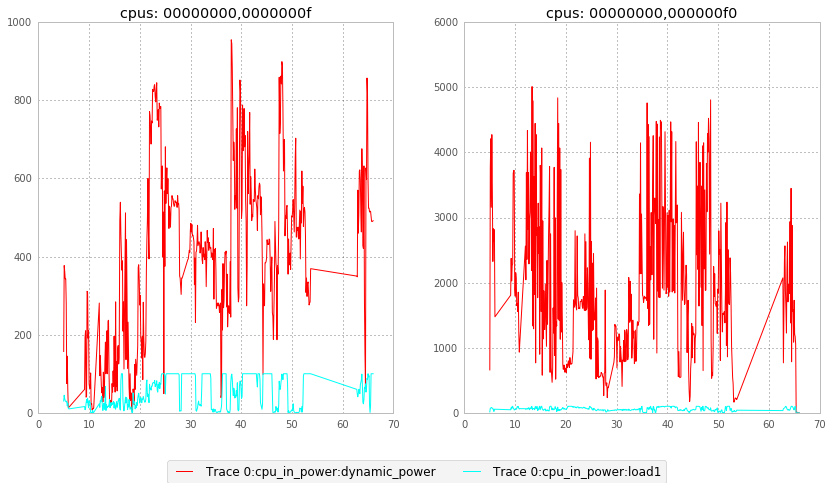

In [38]:
l = trappy.LinePlot(trace1, trappy.cpu_power.CpuInPower, column=["dynamic_power", "load1"],
                    filters={"cdev_state": [1, 0]}, pivot="cpus")
l.view()

Here is the same plot using signals:

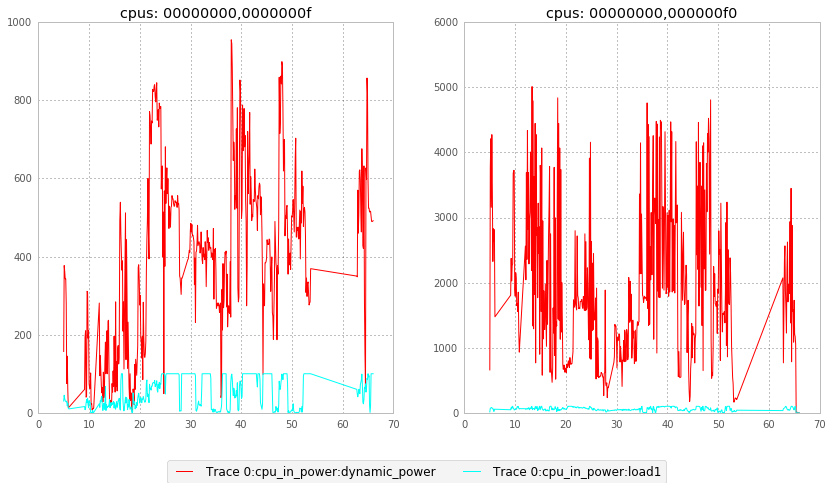

In [39]:
l = trappy.LinePlot(trace1, signals=["cpu_in_power:dynamic_power", "cpu_in_power:load1"],
                    filters={"cdev_state": [1, 0]}, pivot="cpus")
l.view()

# Permute Multi Trace with Multi Columns

The permute parameter allows to plot all the permutations of the specified traces with the specified columns. Each figure will plot the values of each column for those traces. Hence, with N traces and M columns, you will get M figures each displaying N traces.

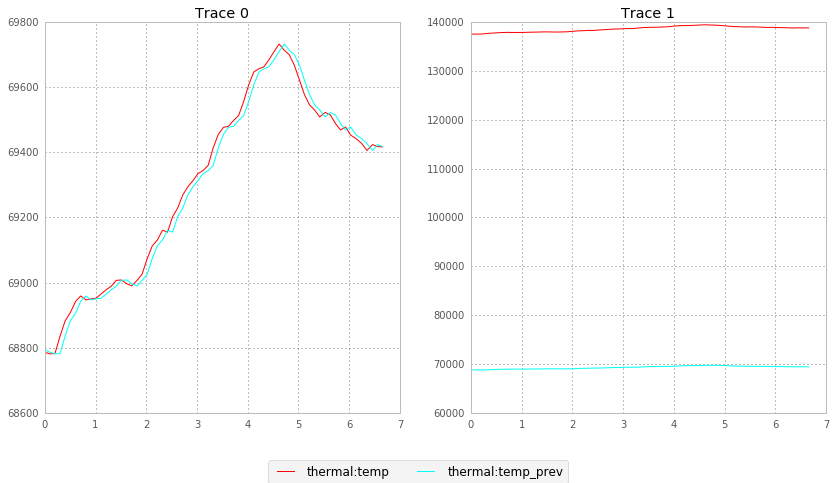

In [30]:
l = trappy.LinePlot([trace1, trace2], trappy.thermal.Thermal, column=["temp", "temp_prev"], permute=True)
l.view()